In [15]:
# Import the modules
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import findspark
findspark.init()
from pyspark.sql import SparkSession
!conda install -c anaconda seaborn -y
import seaborn as sns

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rushi\anaconda3\envs\pythondata

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2022.12.7          |   py37haa95532_0         152 KB  anaconda
    seaborn-0.12.2             |   py37haa95532_0         486 KB  anaconda
    ------------------------------------------------------------
                                           Total:         796 KB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/win-64::seaborn-0.12.2-py37haa95532_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.5.7~ --> anaconda::ca-certificates-2023.01.10-ha



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [16]:
# Read in the CSV file and create the Pandas DataFrame
df_spotify_May = pd.read_csv(
    Path("Resources/May_tracks_metadata.csv")
)

# Review the DataFrame
df_spotify_May.head()

,Unnamed: 0,track.album.id,track.album.name,track.id,track.name,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,...,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,4Z1NyCGQaXlJahP9qm01bG,#Sarkanbaltsarkanais,3bY8hZbtWQpCOGHi1IZvz5,#Sarkanbaltsarkanais,single,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/4Z1NyCGQaXlJahP...,https://api.spotify.com/v1/albums/4Z1NyCGQaXlJ...,...,0.738,0.785,11,-5.003,0.1040,0.0608,0.000000,0.403,0.626,110.118
1,1,4b65l6XzLp2Eg6lDTMmO1k,#osnrap,0KWnRv3wxjltYVB3MqjNd2,Without You,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/4b65l6XzLp2Eg6l...,https://api.spotify.com/v1/albums/4b65l6XzLp2E...,...,0.669,0.698,11,-4.613,0.0910,0.5730,0.000000,0.102,0.286,80.003
2,2,2WFFcvzM0CgLaSq4MSkyZk,- (Deluxe),6jemILri7l5LuPhKs2nuXr,Boat,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/2WFFcvzM0CgLaSq...,https://api.spotify.com/v1/albums/2WFFcvzM0CgL...,...,0.470,0.203,4,-8.676,0.0371,0.7580,0.000002,0.312,0.325,153.578
3,3,2WFFcvzM0CgLaSq4MSkyZk,- (Deluxe),6ZZf5a8oiInHDkBe9zXfLP,Curtains,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/2WFFcvzM0CgLaSq...,https://api.spotify.com/v1/albums/2WFFcvzM0CgL...,...,0.500,0.757,6,-6.542,0.0522,0.0989,0.000003,0.324,0.443,175.944
4,4,2WFFcvzM0CgLaSq4MSkyZk,- (Deluxe),4u4A4lPpiw54evLxTaLeRJ,Dusty,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/2WFFcvzM0CgLaSq...,https://api.spotify.com/v1/albums/2WFFcvzM0CgL...,...,0.711,0.550,2,-9.682,0.0332,0.2260,0.009280,0.120,0.616,146.928


In [17]:
df = df_spotify_May[['track.album.name','track.name','track.album.album_type',
                       'track.album.artists','track.popularity','danceability',
                      'energy', 'key', 'loudness','speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo']].copy()
df

,track.album.name,track.name,track.album.album_type,track.album.artists,track.popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,[{'external_urls': {'spotify': 'https://open.s...,38.0,0.738,0.785,11,-5.003,0.1040,0.0608,0.000000,0.4030,0.626,110.118
1,#osnrap,Without You,album,[{'external_urls': {'spotify': 'https://open.s...,65.0,0.669,0.698,11,-4.613,0.0910,0.5730,0.000000,0.1020,0.286,80.003
2,- (Deluxe),Boat,album,[{'external_urls': {'spotify': 'https://open.s...,75.0,0.470,0.203,4,-8.676,0.0371,0.7580,0.000002,0.3120,0.325,153.578
3,- (Deluxe),Curtains,album,[{'external_urls': {'spotify': 'https://open.s...,83.0,0.500,0.757,6,-6.542,0.0522,0.0989,0.000003,0.3240,0.443,175.944
4,- (Deluxe),Dusty,album,[{'external_urls': {'spotify': 'https://open.s...,65.0,0.711,0.550,2,-9.682,0.0332,0.2260,0.009280,0.1200,0.616,146.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,關掉 / 打開,我就想你,album,[{'external_urls': {'spotify': 'https://open.s...,64.0,0.501,0.462,7,-7.102,0.0726,0.1860,0.000000,0.4180,0.585,82.513
3057,隱形遊樂場,隱形遊樂場,single,[{'external_urls': {'spotify': 'https://open.s...,62.0,0.485,0.452,7,-7.212,0.0379,0.4360,0.000007,0.1960,0.158,133.517
3058,青と夏,点描の唄,single,[{'external_urls': {'spotify': 'https://open.s...,74.0,0.502,0.632,0,-4.612,0.0273,0.4470,0.000000,0.1030,0.308,152.014
3059,青春のエキサイトメント,愛を伝えたいだとか,album,[{'external_urls': {'spotify': 'https://open.s...,69.0,0.673,0.850,2,-5.021,0.0337,0.0345,0.000011,0.0943,0.793,100.008


In [18]:
df[df['track.name'].duplicated()]

,track.album.name,track.name,track.album.album_type,track.album.artists,track.popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
118,ALPHA,Jena Mbreter 2,album,[{'external_urls': {'spotify': 'https://open.s...,49.0,0.775,0.838,11,-4.092,0.0889,0.32900,0.000000,0.0354,0.588,89.929
164,Ajini,Ajini,single,[{'external_urls': {'spotify': 'https://open.s...,49.0,0.776,0.625,2,-8.946,0.0845,0.23600,0.000021,0.0680,0.505,98.032
177,Almost Healed,All My Life (feat. J. Cole),album,[{'external_urls': {'spotify': 'https://open.s...,79.0,0.787,0.570,3,-5.881,0.2250,0.04490,0.000000,0.1350,0.733,142.974
356,"Besharam Rang (From ""Pathaan"")","Besharam Rang (From ""Pathaan"")",single,[{'external_urls': {'spotify': 'https://open.s...,82.0,0.773,0.795,8,-5.537,0.0412,0.05870,0.002370,0.1540,0.649,115.997
464,Ceramics Runway,17,album,[{'external_urls': {'spotify': 'https://open.s...,62.0,0.748,0.777,10,-4.783,0.0430,0.04710,0.004260,0.1260,0.970,121.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,瓦合,但,single,[{'external_urls': {'spotify': 'https://open.s...,48.0,0.606,0.484,2,-6.497,0.0376,0.00615,0.000129,0.1030,0.228,95.977
3026,瓦合,但,album,[{'external_urls': {'spotify': 'https://open.s...,58.0,0.606,0.484,2,-6.497,0.0376,0.00615,0.000129,0.1030,0.228,95.977
3030,瓦合,床,single,[{'external_urls': {'spotify': 'https://open.s...,57.0,0.660,0.768,7,-7.187,0.0313,0.04410,0.267000,0.0668,0.356,120.027
3031,瓦合,床,album,[{'external_urls': {'spotify': 'https://open.s...,60.0,0.660,0.768,7,-7.187,0.0313,0.04410,0.267000,0.0668,0.356,120.027


In [19]:
df[df['track.name']=='Jena Mbreter 2'] 

,track.album.name,track.name,track.album.album_type,track.album.artists,track.popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
117,ALPHA,Jena Mbreter 2,album,[{'external_urls': {'spotify': 'https://open.s...,56.0,0.775,0.838,11,-4.092,0.0889,0.329,0.0,0.0354,0.588,89.929
118,ALPHA,Jena Mbreter 2,album,[{'external_urls': {'spotify': 'https://open.s...,49.0,0.775,0.838,11,-4.092,0.0889,0.329,0.0,0.0354,0.588,89.929


In [20]:
# Grouping by track_id number to get rid of duplicates and keeping the maximum values in each column.
df=df.groupby(['track.name']).max()

In [8]:
# Ensuring that the duplicates have been eliminated
df

,track.album.name,track.album.album_type,track.album.artists,track.popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track.name,,,,,,,,,,,,,,
#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,[{'external_urls': {'spotify': 'https://open.s...,38.0,0.738,0.785,11,-5.003,0.1040,0.06080,0.000000,0.4030,0.6260,110.118
'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,[{'external_urls': {'spotify': 'https://open.s...,63.0,0.474,0.857,5,-2.577,0.0571,0.13400,0.000000,0.1130,0.5520,155.710
00:00,00:00,single,[{'external_urls': {'spotify': 'https://open.s...,60.0,0.563,0.572,4,-8.769,0.1250,0.64000,0.002270,0.1000,0.3920,95.013
0321,0321,single,[{'external_urls': {'spotify': 'https://open.s...,67.0,0.658,0.417,2,-6.485,0.0366,0.62500,0.000000,0.1320,0.0748,171.974
085 - Ao Vivo,Pode Crê (Ao Vivo),album,[{'external_urls': {'spotify': 'https://open.s...,83.0,0.850,0.655,2,-2.891,0.0298,0.21100,0.000000,0.9520,0.7970,106.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
雪 Distance,Uniconfication,album,[{'external_urls': {'spotify': 'https://open.s...,68.0,0.592,0.284,1,-9.398,0.0319,0.73900,0.000001,0.1730,0.6710,99.827
青と夏,Attitude,album,[{'external_urls': {'spotify': 'https://open.s...,71.0,0.310,0.891,4,-1.660,0.0469,0.00157,0.000000,0.2840,0.7480,184.886
風雨不改 (電影《阿媽有咗第二個》主題曲),風雨不改 (電影《阿媽有咗第二個》主題曲),single,[{'external_urls': {'spotify': 'https://open.s...,70.0,0.319,0.198,0,-11.611,0.0402,0.94200,0.000009,0.0817,0.2870,62.925


In [21]:
df['artist'] = df['track.album.artists'].str.extract(r"'name': '(.+?)'")
df.drop('track.album.artists', axis=1, inplace=True)
df

,track.album.name,track.album.album_type,track.popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist
track.name,,,,,,,,,,,,,,
#Sarkanbaltsarkanais,#Sarkanbaltsarkanais,single,38.0,0.738,0.785,11,-5.003,0.1040,0.06080,0.000000,0.4030,0.6260,110.118,Bermudu Divstūris
'Til We Meet Again,MY WORLD - The 3rd Mini Album,single,63.0,0.474,0.857,5,-2.577,0.0571,0.13400,0.000000,0.1130,0.5520,155.710,aespa
00:00,00:00,single,60.0,0.563,0.572,4,-8.769,0.1250,0.64000,0.002270,0.1000,0.3920,95.013,Lartiste
0321,0321,single,67.0,0.658,0.417,2,-6.485,0.0366,0.62500,0.000000,0.1320,0.0748,171.974,space x
085 - Ao Vivo,Pode Crê (Ao Vivo),album,83.0,0.850,0.655,2,-2.891,0.0298,0.21100,0.000000,0.9520,0.7970,106.031,MC Rogerinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
雪 Distance,Uniconfication,album,68.0,0.592,0.284,1,-9.398,0.0319,0.73900,0.000001,0.1730,0.6710,99.827,Capper
青と夏,Attitude,album,71.0,0.310,0.891,4,-1.660,0.0469,0.00157,0.000000,0.2840,0.7480,184.886,Mrs. GREEN APPLE
風雨不改 (電影《阿媽有咗第二個》主題曲),風雨不改 (電影《阿媽有咗第二個》主題曲),single,70.0,0.319,0.198,0,-11.611,0.0402,0.94200,0.000009,0.0817,0.2870,62.925,Keung To


In [22]:
columns_names = {'track.album.name': 'album_name', 'track.name': 'track_name', 'track.album.album_type': 'album_type', 'track.popularity':'popularity' }
df.rename(columns=columns_names, inplace=True)

In [23]:
# Checking the correlation between variables
df.corr()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.054417,0.016392,-0.007657,0.159487,-0.158957,-0.010175,-0.027115,0.023124,-0.040651,0.033174
danceability,-0.054417,1.000000,0.126721,0.042740,0.071690,0.169272,-0.188604,-0.017752,-0.120996,0.370138,-0.146601
energy,0.016392,0.126721,1.000000,0.033958,0.700748,0.008710,-0.534025,-0.060066,0.165706,0.336924,0.080662
key,-0.007657,0.042740,0.033958,1.000000,0.029897,0.029366,-0.032025,-0.001841,0.005630,0.075017,0.020752
loudness,0.159487,0.071690,0.700748,0.029897,1.000000,-0.067523,-0.363907,-0.220430,0.109505,0.252967,0.052360
speechiness,-0.158957,0.169272,0.008710,0.029366,-0.067523,1.000000,-0.005743,-0.045671,-0.019259,0.058277,0.054437
acousticness,-0.010175,-0.188604,-0.534025,-0.032025,-0.363907,-0.005743,1.000000,-0.010393,-0.037670,-0.143503,-0.045217
instrumentalness,-0.027115,-0.017752,-0.060066,-0.001841,-0.220430,-0.045671,-0.010393,1.000000,-0.030358,-0.083104,0.014257
liveness,0.023124,-0.120996,0.165706,0.005630,0.109505,-0.019259,-0.037670,-0.030358,1.000000,0.064340,0.029230
valence,-0.040651,0.370138,0.336924,0.075017,0.252967,0.058277,-0.143503,-0.083104,0.064340,1.000000,0.048219


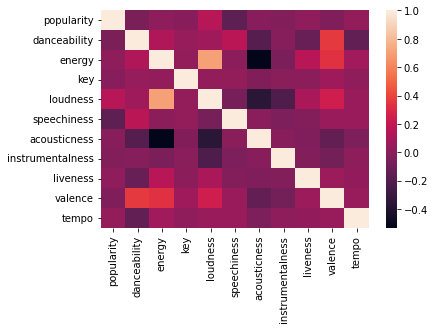

In [24]:
# Creating a heatmap to visualize correlations 
ax = sns.heatmap(df.corr(), annot=False)

In [25]:
# Saving the clean dataframe as a csv
df.to_csv('Resources/clean_May_tracks.csv')

In [28]:
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

RuntimeError: Java gateway process exited before sending its port number

In [ ]:
from pyspark import SparkFiles
clean_df = spark.read.csv("Resources/clean_May_tracks.csv", header=True, inferSchema=True)

# Show DataFrame
clean_df.show()

In [ ]:
# Creating our temporary view
clean_df.createOrReplaceTempView('spotify')

In [ ]:
# Most number of songs released per artist - top 10
spark.sql("""
  SELECT
    artist,
    count(*) AS number_of_songs
  FROM spotify
  GROUP BY artist
  ORDER BY 2 DESC
  LIMIT 10
  """).show()

In [ ]:
# clean_df.write.csv('spotify_spark.csv')